DM_NS_contours.ipynb -- extract contours of constant dark matter fraction, baryon mass and dark baryon mass in the M-R plane

In [25]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [26]:
# load central density, radius and mass data (computed separately)

dat = np.genfromtxt('macro-sly.csv',delimiter=',',dtype=None,names=True)
print(dat.dtype.names)
print(len(dat),np.sqrt(len(dat)))

('rhoc', 'rhocdm', 'R', 'M', 'Rdm', 'Mdm', 'Mb', 'Md', 'Mg', 'fdm')
2304 48.0


Constant dark matter fraction contours

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

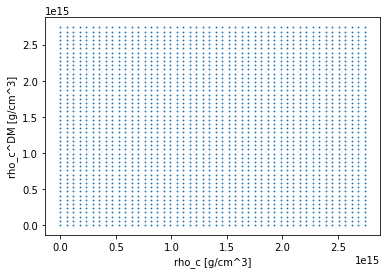

In [27]:
# plot the rhoc-rhocdm data

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3)

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

In [28]:
# to associate the dark matter fraction to each point in rhoc-rhocdm space, interpolate 3D (rhoc,rhocdm,fdm) data to get a function fdm(rhoc,rhocdm)

x = dat['rhoc'] # input data
y = dat['rhocdm']
z = dat['fdm']

X = np.linspace(0.1e14,3.1e15,1000) # the grid where we'll evaluate fdm(rhoc,rhocdm)
Y = np.linspace(0.1e14,3.1e15,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'linear') # fdm evaluated on the grid, with one of three methods: nearest, linear, cubic

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

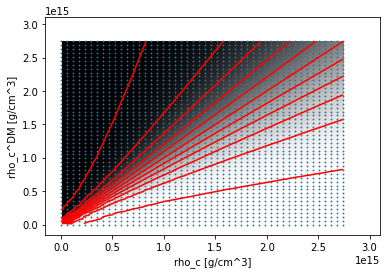

In [29]:
# plot the interpolated fdm function 

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show fdm(rhoc,rhocdm) as a color map (darker = larger fdm)

num_cs = 9
cs = plt.contour(x_grid,y_grid,outdat,list(np.geomspace(1e-2,0.1,2))+list(np.linspace(0.1,0.9,num_cs)[1:])+list(reversed(1.-np.geomspace(1e-2,0.1,2)[:-1])),colors='r') # plot the contours of constant fdm(rhoc,rhocdm)

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3) # overlay the rhoc-rhocdm scatter points for comparison

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

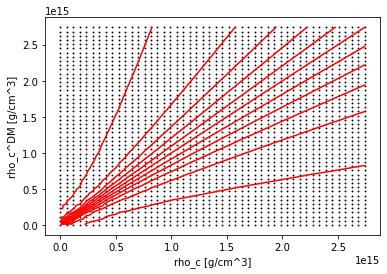

In [30]:
# extract the (rhoc,rhocdm) coordinates of the constant-fdm contours

contours = []
for i in range(num_cs+3):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours

for c in contours: plt.plot(c[:,0],c[:,1],color='r') # plot the extracted contours

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3,c='k') # overlay scatter points

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

In [31]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points

rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
c_out, cdm_out = [], []
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out,cdm_out = [], []
  for rhoc,rhocdm in zip(c,cdm):

    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]

  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

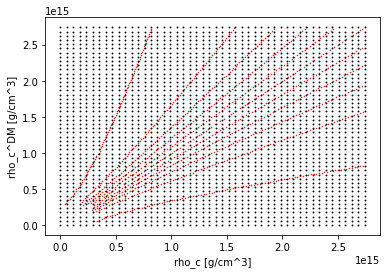

In [32]:
# show the downsampled (rhoc,rhocdm) sequences

for rhocs,rhocdms in zip(rhocs_out,rhocdms_out): plt.scatter(rhocs,rhocdms,color='r',marker='.',s=1) # plot the extracted contours

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3,c='k') # overlay scatter points

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

Feed these (rhoc,rhocdm) sequences back into two-fluid TOV solver to compute sequences of constant dark matter fraction

Constant baryon mass or dark baryon mass contours

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

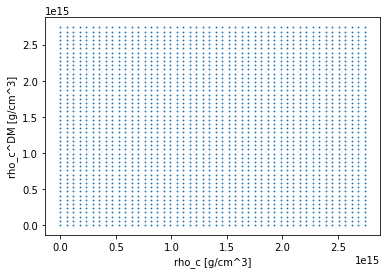

In [33]:
# plot the rhoc-rhocdm data

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3)

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

In [34]:
# to associate the (dark) baryon mass to each point in rhoc-rhocdm space, interpolate 3D (rhoc,rhocdm,Mb) data to get a function Mb(rhoc,rhocdm)

x = dat['rhoc'] # input data
y = dat['rhocdm']
z = dat['Mb']
zdm = dat['Md']

X = np.linspace(0.1e14,3.1e15,1000) # the grid where we'll evaluate Mb(rhoc,rhocdm)
Y = np.linspace(0.1e14,3.1e15,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'linear') # Mb evaluated on the grid, with one of three methods: nearest, linear, cubic
outdat_dm = scipy.interpolate.griddata((x,y),zdm,(x_grid,y_grid),'linear') # Md evaluated on the grid

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

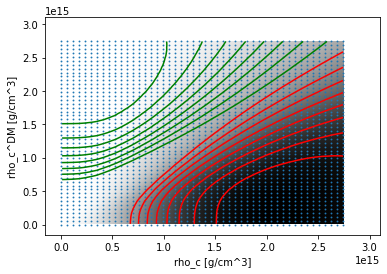

In [35]:
# plot the interpolated Mb and Md functions

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Mb(rhoc,rhocdm) as a color map (darker = larger Mb)
#plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Md(rhoc,rhocdm) as a color map (darker = larger Mb) -- but can't seem to show two colormaps at once

num_cs = 11
cs = plt.contour(x_grid,y_grid,outdat,list(np.linspace(1.,3.,num_cs)),colors='r') # plot the contours of constant Mb(rhoc,rhocdm)
cs_dm = plt.contour(x_grid,y_grid,outdat_dm,list(np.linspace(1.,3.,num_cs)),colors='g') # plot the contours of constant Md(rhoc,rhocdm)

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3) # overlay the rhoc-rhocdm scatter points for comparison

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

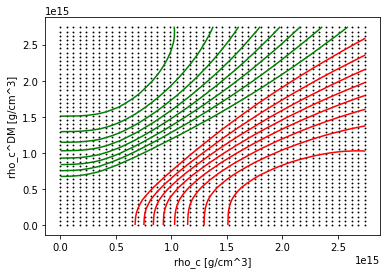

In [36]:
# extract the (rhoc,rhocdm) coordinates of the constant-Mb or -Md contours

contours = []
for i in range(num_cs+1):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours

for c in contours: plt.plot(c[:,0],c[:,1],color='r') # plot the extracted contours

contours_dm = []
for i in range(num_cs+1):
  try: c = cs_dm.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours_dm += [c] # list that stores all the extracted contours

for c_dm in contours_dm: plt.plot(c_dm[:,0],c_dm[:,1],color='g') # plot the extracted contours

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3,c='k') # overlay scatter points

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

In [37]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-Mb or -Md sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points

for c in contours_dm:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points

rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
c_out, cdm_out = [], []
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []
  for rhoc,rhocdm in zip(c,cdm):

    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]

  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

Text(0, 0.5, 'rho_c^DM [g/cm^3]')

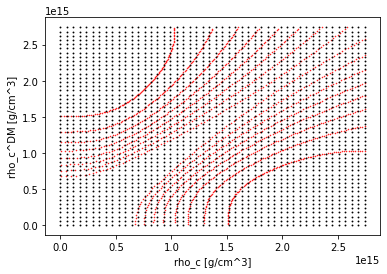

In [38]:
# show the downsampled (rhoc,rhocdm) sequences

for rhocs,rhocdms in zip(rhocs_out,rhocdms_out): plt.scatter(rhocs,rhocdms,color='r',marker='.',s=1) # plot the extracted contours

plt.scatter(dat['rhoc'],dat['rhocdm'],marker='.',s=3,c='k') # overlay scatter points

plt.xlabel('rho_c [g/cm^3]')
plt.ylabel('rho_c^DM [g/cm^3]')

Feed these (rhoc,rhocdm) sequences back into two-fluid TOV solver to compute sequences of constant (dark) baryon mass. Determine the minimum and maximum gravitational mass along each sequence, extract the corresponding (rhoc,rhocdm) coordinates and use to define a surface of stable central density pairs in (rhoc,rhocdm) space. When computing stellar sequences, discard central densities that lie off of that surface.

Obsolete stuff...

In [ ]:
# throw out data points that don't correspond to physical NSs (mass too low, or zero radius)

#dat = dat[dat['R'] > 1.]
#dat = dat[dat['Mg'] >= 0.5]
print(len(dat),np.sqrt(len(dat)))

In [ ]:
# plot the surviving M-R data

plt.scatter(dat['R'],dat['Mg'],marker='.',s=3)

plt.xlabel('R [km]')
plt.ylabel('M [Msun]')

In [9]:
# to associate the dark matter fraction to each point in M-R space, interpolate 3D (R,M,fdm) data to get a function fdm(R,M)

x = dat['R'] # input data
y = dat['M']
z = dat['fdm']

X = np.linspace(1.,13.,1000) # the grid where we'll evaluate fdm(R,M)
Y = np.linspace(0.5,2.1,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'cubic') # fdm evaluated on the grid, with one of three methods: nearest, linear, cubic

Text(0, 0.5, 'M [Msun]')

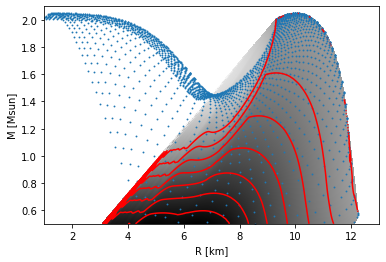

In [10]:
# plot the interpolated fdm function 

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show fdm(R,M) as a color map (darker = larger fdm)

num_cs = 10
cs = plt.contour(x_grid,y_grid,outdat,np.linspace(0.,1.,num_cs+1),colors='r') # plot the contours of constant fdm(R,M)

plt.scatter(dat['R'],dat['Mg'],marker='.',s=3) # overlay the M-R scatter points for comparison

plt.xlabel('R [km]')
plt.ylabel('M [Msun]')

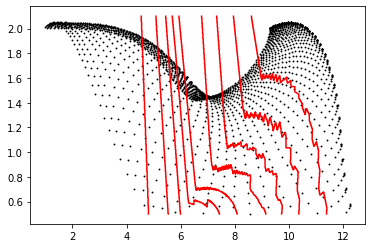

In [ ]:
# extract the (R,M) coordinates of the constant-fdm contours

contours = []
for i in range(0,num_cs+1):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours

for c in contours: plt.plot(c[:,0],c[:,1],color='r') # plot the extracted contours

plt.scatter(dat['R'],dat['Mg'],marker='.',s=3,c='k') # overlay scatter points

Now we want to repeat this procedure for contours of constant Mb (baryon mass) and Md (dark baryon mass)